### Rates


 - bond prices and yields move inversely
 - bond premium: price > 100 coupon rate > yield
 - bond discount: price < 100 coupon rate < yield
 - bond par: price = 100 coupon rate = yield
 - relationship between price and yield is non-linear due to convexity

In [7]:
import numpy_financial as npf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/numpy_financial/_financial.py:531: RuntimeWarning: invalid value encountered in true_divide
  fact = np.where(rate == 0, nper, (1+rate*when)*(temp-1)/rate)
/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/numpy_financial/_financial.py:531: RuntimeWarning: invalid value encountered in true_divide
  fact = np.where(rate == 0, nper, (1+rate*when)*(temp-1)/rate)


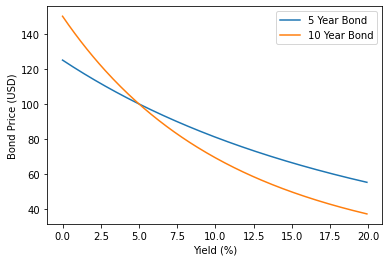

In [8]:
# Create an array of bond yields and convert to DataFrame
bond_yields = np.arange(0, 20, 0.1)
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])

# Add columns for different bonds
bond['bond_price_5Y'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=5, pmt=5, fv=100)
bond['bond_price_10Y'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=10, pmt=5, fv=100)

# Plot graph of bonds
plt.plot(bond['bond_yield'], bond['bond_price_5Y'], label='5 Year Bond')
plt.plot(bond['bond_yield'], bond['bond_price_10Y'], label='10 Year Bond')
plt.xlabel('Yield (%)')
plt.ylabel('Bond Price (USD)')
plt.legend()
plt.show()

### Duration
 
 - can be thought of as the average time taken to get your money back
 - measures sensitivity of bond prices to interest rates
 - one duration definition is this:
     - % change in bond price per 1% change in yield
 - duration is the derivative of price with respect to bond yields or the slope of the tangent line of the curve between yield and bond price
 - all other things equal:
     - longer maturity bonds will have higher duration
     - lower or zero coupon rate bonds will have higher duration
     - bond price curve is steeper for lower yields, so lower yielding bonds will have higher duration
 - simple duration formula:
     - dur = (Price Down - Price Up) / (2 * Price at Current Yield * Dy)
     - Dy = 1%
 - duration is a linear approximation however and does not reflect convexity of bond prices
 - duration is accurate for small changes in yields only (again due to convexity in bond prices)

In [10]:
# Price a 10 year bond with 3% annual coupon at 3% yield and print
bond_1 = -npf.pv(rate=0.03, nper=10, pmt=3, fv=100)
print("10 Year Bond 3% Yield: ", bond_1)

# Price a 10 year bond with 3% annual coupon at 4% yield and print
bond_2 = -npf.pv(rate=0.04, nper=10, pmt=3, fv=100)
print("10 Year Bond 4% Yield: ", bond_2)

# Price a 20 year bond with 3% annual coupon at 3% yield and print
bond_3 = -npf.pv(rate=0.03, nper=20, pmt=3, fv=100)
print("20 Year Bond 3% Yield: ", bond_3)

# Price a 20 year bond with 3% annual coupon at 4% yield and print
bond_4 = -npf.pv(rate=0.04, nper=20, pmt=3, fv=100)
print("20 Year Bond 4% Yield: ", bond_4)

10 Year Bond 3% Yield:  100.0
10 Year Bond 4% Yield:  91.88910422064497
20 Year Bond 3% Yield:  100.0
20 Year Bond 4% Yield:  86.4096736550323


In [11]:
# Find the price of the zero coupon bond at current yield levels
price = -npf.pv(rate=0.03, nper=10, pmt=0, fv=100)

# Find the price of the zero coupon bond at 1% higher yield levels
price_up = -npf.pv(rate=0.04, nper=10, pmt=0, fv=100)

# Find the price of the zero coupon bond at 1% lower yield levels
price_down = -npf.pv(rate=0.02, nper=10, pmt=0, fv=100)

# Calculate duration using the formula and print result
duration = (price_down - price_up) / (2 * price * 0.01)
print("Zero Coupon Bond Duration: ", duration)

Zero Coupon Bond Duration:  9.728888259316797


In [12]:
# Find the price of the coupon bond at current yield levels
price = -npf.pv(rate=0.03, nper=10, pmt=3, fv=100)

# Find the price of the coupon bond at 1% higher yield levels
price_up = -npf.pv(rate=0.04, nper=10, pmt=3, fv=100)

# Find the price of the coupon bond at 1% lower yield levels
price_down = -npf.pv(rate=0.02, nper=10, pmt=3, fv=100)

# Calculate duration using the formula
duration = (price_down - price_up) / (2 * price * 0.01)

# Print the result
print("Coupon Paying Bond Duration: ", duration)

Coupon Paying Bond Duration:  8.54674039279864


In [13]:
# Find & print duration of 10 year bond with 3% coupon & 5% yield
price_10y = -npf.pv(rate=0.05, nper=10, pmt=3, fv=100)
price_up_10y = -npf.pv(rate=0.06, nper=10, pmt=3, fv=100)
price_down_10y = -npf.pv(rate=0.04, nper=10, pmt=3, fv=100)
duration_10y = (price_down_10y - price_up_10y) / (2 * price_10y * 0.01)
print("10 Year Bond: ", duration_10y)

10 Year Bond:  8.260370518687731


In [14]:
# Find & print duration of 20 year bond with 3% coupon & 5% yield
price_20y = -npf.pv(rate=0.05, nper=20, pmt=3, fv=100)
price_up_20y = -npf.pv(rate=0.06, nper=20, pmt=3, fv=100)
price_down_20y = -npf.pv(rate=0.04, nper=20, pmt=3, fv=100)
duration_20y = (price_down_20y - price_up_20y) / (2 * price_20y * 0.01)
print("20 Year Bond: ", duration_20y)

20 Year Bond:  13.865652120642753


/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/numpy_financial/_financial.py:531: RuntimeWarning: invalid value encountered in true_divide
  fact = np.where(rate == 0, nper, (1+rate*when)*(temp-1)/rate)


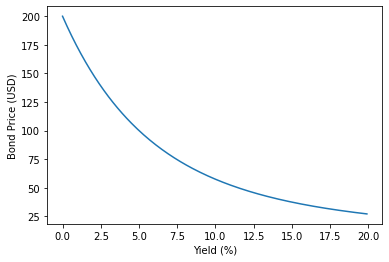

In [15]:
# Create an array of bond yields
bond_yields = np.arange(0, 20, 0.1)

# Convert this array into a pandas DataFrame and add column title
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])

# Add bond price column with price varying according to the yield
bond['bond_price'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=20, pmt=5, fv=100)

# Plot graph of bond yields against prices, add x-axis and y-axis labels, show plot
plt.plot(bond['bond_yield'], bond['bond_price'])
plt.xlabel('Yield (%)')
plt.ylabel('Bond Price (USD)')
plt.show()

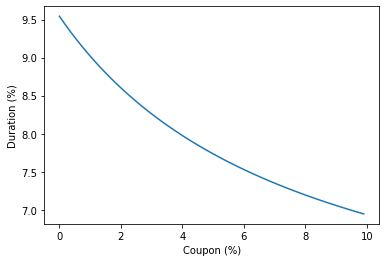

In [16]:
# Create array of coupon rates and assign to pandas DataFrame
bond_coupon = np.arange(0, 10, 0.1)
bond = pd.DataFrame(bond_coupon, columns=['bond_coupon'])

# Calculate bond price, price_up, price_down, and duration
bond['price'] = -npf.pv(rate=0.05, nper=10, pmt=bond['bond_coupon'], fv=100)
bond['price_up'] = -npf.pv(rate=0.05 + 0.01, nper=10, pmt=bond['bond_coupon'], fv=100)
bond['price_down'] = -npf.pv(rate=0.05 - 0.01, nper=10, pmt=bond['bond_coupon'], fv=100)
bond['duration'] = (bond['price_down'] - bond['price_up']) / (2 * bond['price'] * 0.01)

# Plot coupon vs. duration, add labels & title, show plot
plt.plot(bond['bond_coupon'], bond['duration'])
plt.xlabel('Coupon (%)')
plt.ylabel('Duration (%)')
plt.show()

### Dollar duration
 - dollar duration = the $ change in the bond price per 1% change in yield
 - dollar dur = duration * price * 1%
 - DV01 = duration * price * 1bp (1b = 1/10000)
 - dollar duration and DV01 are more commonly used in the real world to quickly measure the interest rate risk of a bond or portfolio (also used for other financial instruments that contain some interest rate risk)
 - using duration to predict price impacts is very common when managing a large portfolio of bonds, where repricing each bond would be very time consuming (instead, you can find the dollar duration of the portfolio and use this to predict what will happen to the portfolio as interest rates change)

In [17]:
# Find the duration of the bond
price = -npf.pv(rate=0.05, nper=30, pmt=3.5, fv=100)
price_up = -npf.pv(rate=0.06, nper=30, pmt=3.5, fv=100)
price_down = -npf.pv(rate=0.04, nper=30, pmt=3.5, fv=100)
duration = (price_down - price_up) / (2 * price * 0.01)

# Find the dollar duration of the bond
dollar_duration = duration * price * 0.01
print("Dollar Duration: ", dollar_duration)

# Find the DV01 of the bond
dv01 = duration * price * 0.0001
print("DV01: ", dv01)

Dollar Duration:  12.88303061419567
DV01:  0.1288303061419567


In [18]:
# Assign DV01 of portfolio and bond to variables
portfolio_dv01 = 5000
bond_dv01 = 0.1288
bond_price = 76.94

# Calculate quantity of bond to hedge portfolio
hedge_quantity = portfolio_dv01 / bond_dv01
print("Number of bonds to sell: ", hedge_quantity)

# Calculate dollar amount of bond to hedge portfolio
hedge_amount = hedge_quantity * bond_price
print("Dollar amount to sell: USD", hedge_amount)

Number of bonds to sell:  38819.875776397515
Dollar amount to sell: USD 2986801.2422360247


In [19]:
# Assign bond price, dollar duration, yield change to variables
bond_price = 113.36
dollar_duration = 4.83
yield_change = -0.02

# Predict bond price change using duration
price_prediction = -100 * dollar_duration * yield_change
print("Predicted Change: USD ", price_prediction)

# Find actual price change and compare
price_actual = -npf.pv(rate=0.02, nper=5, pmt=7, fv=100) - bond_price
print("Actual Change: USD ", price_actual)
print("Estimation Error: USD ", price_prediction - price_actual)

Predicted Change: USD  9.66
Actual Change: USD  10.207297542521033
Estimation Error: USD  -0.5472975425210329


### Convexity

 - measures the curvature of bond prices
 - higher convexity means a more curved price/yield relationship in bonds
 
 <img src="assets/qrm/rates_convexity.png" style="height: 260px;"/>
 
 - convexity is an advantage -> when yields fall prices rise more than they fall when yields rise
 
 - lower coupon bonds have higher convexity
 - longer maturing bonds have higher convexity
 - lower yielding bonds have higher higher convexity

In [20]:
# Price a 10 year bond with 5% coupon and 5% yield, reprice at higher and lower yields
price = -npf.pv(rate=0.05, nper=10, pmt=5, fv=100)
price_up = -npf.pv(rate=0.06, nper=10, pmt=5, fv=100)
price_down = -npf.pv(rate=0.04, nper=10, pmt=5, fv=100)

# Find the duration and dollar duration of the bond
duration = (price_down - price_up) / (2 * price * 0.01)
dollar_duration = duration * price * 0.01

# Create an array of yields from 0 to 10 in steps of 0.1, convert to DataFrame
bond_yields = np.arange(0, 10, 0.1)
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])

# Add a column called price with the bond price for each yield level
bond['price'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=10, pmt=5, fv=100)

/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/numpy_financial/_financial.py:531: RuntimeWarning: invalid value encountered in true_divide
  fact = np.where(rate == 0, nper, (1+rate*when)*(temp-1)/rate)


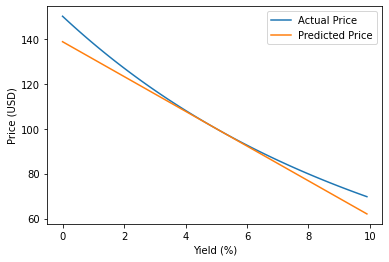

In [21]:
# Add a column called yield_change with the current yield minus original yield
bond['yield_change'] = (bond['bond_yield'] - 5)

# Find the predicted bond price change using dollar duration then find predicted price
bond['price_change'] = -100 * dollar_duration * bond['yield_change'] / 100
bond['predicted_price'] = price + bond['price_change'] 

# Plot bond yields against predicted and actual prices, add labels, legend, and display
plt.plot(bond['bond_yield'], bond['price'])
plt.plot(bond['bond_yield'], bond['predicted_price'])
plt.xlabel('Yield (%)')
plt.ylabel('Price (USD)')
plt.legend(["Actual Price", "Predicted Price"])
plt.show()

In [22]:
# Find the price of a 20 year bond with 6% coupon and 5% yield
price = -npf.pv(rate=0.05, nper=20, pmt=6, fv=100)

# Find the price of the same bond for a 1% higher and 1% lower level of yields
price_up = -npf.pv(rate=0.06, nper=20, pmt=6, fv=100)
price_down = -npf.pv(rate=0.04, nper=20, pmt=6, fv=100)

# Find the convexity of the bond and print the result
convexity = (price_down + price_up - 2 * price) / (price * 0.01 ** 2)
print("Convexity: ", convexity)

Convexity:  200.6213463156488


In [23]:
# Find the price of a 5 year bond with 3% yield and 1% coupon
price_1 = -npf.pv(rate=0.03, nper=5, pmt=1, fv=100)

# Shift yields up and down 1% and reprice
price_up_1 = -npf.pv(rate=0.04, nper=5, pmt=1, fv=100)
price_down_1 = -npf.pv(rate=0.02, nper=5, pmt=1, fv=100)

# Find convexity of the bond and print the result
convexity_1 = (price_down_1 + price_up_1 - 2 * price_1) / (price_1 * 0.01 ** 2)
print("Low Coupon Bond Convexity: ", convexity_1)

Low Coupon Bond Convexity:  27.509977561710695


In [24]:
# Find the price of a 5 year bond with 3% yield and 10% coupon
price_2 = -npf.pv(rate=0.03, nper=5, pmt=10, fv=100)

# Shift yields up and down 1% and reprice
price_up_2 = -npf.pv(rate=0.04, nper=5, pmt=10, fv=100)
price_down_2 = -npf.pv(rate=0.02, nper=5, pmt=10, fv=100)

# Find convexity of the bond and print the result
convexity_2 = (price_down_2 + price_up_2 - 2 * price_2) / (price_2 * 0.01 ** 2)
print("High Coupon Bond Convexity: ", convexity_2)

High Coupon Bond Convexity:  22.922469468592325


/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/numpy_financial/_financial.py:531: RuntimeWarning: invalid value encountered in true_divide
  fact = np.where(rate == 0, nper, (1+rate*when)*(temp-1)/rate)
/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/numpy_financial/_financial.py:531: RuntimeWarning: invalid value encountered in true_divide
  fact = np.where(rate == 0, nper, (1+rate*when)*(temp-1)/rate)


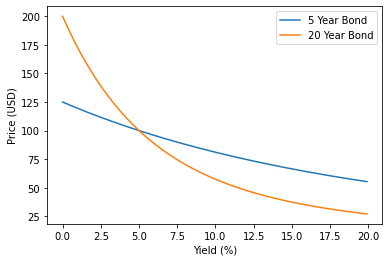

In [25]:
# Create array of yields and convert to pandas DataFrame
bond_yields = np.arange(0, 20, 0.1)
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])

# Add columns for 5 year and 20 year bonds
bond['price_5y'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=5, pmt=5, fv=100)
bond['price_20y'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=20, pmt=5, fv=100)

# Create plot for bond bonds, add labels to axes, legend, and display
plt.plot(bond['bond_yield'], bond['price_5y'])
plt.plot(bond['bond_yield'], bond['price_20y'])
plt.xlabel('Yield (%)')
plt.ylabel('Price (USD)')
plt.legend(["5 Year Bond", "20 Year Bond"])
plt.show()

/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/numpy_financial/_financial.py:531: RuntimeWarning: invalid value encountered in true_divide
  fact = np.where(rate == 0, nper, (1+rate*when)*(temp-1)/rate)
/Users/lazaros/opt/anaconda3/lib/python3.8/site-packages/numpy_financial/_financial.py:531: RuntimeWarning: invalid value encountered in true_divide
  fact = np.where(rate == 0, nper, (1+rate*when)*(temp-1)/rate)


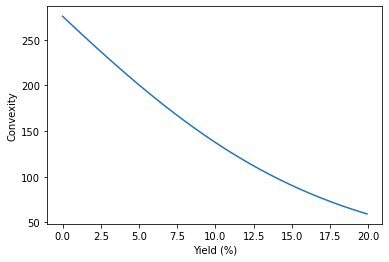

In [26]:
# Create array of bond yields and covert to pandas DataFrame
bond_yields = np.arange(0, 20, 0.1)
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])

# Find price of bond, reprice for higher and lower yields, calculate convexity
bond['price'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=20, pmt=6, fv=100)
bond['price_up'] = -npf.pv(rate=bond['bond_yield'] / 100 + 0.01, nper=20, pmt=6, fv=100)
bond['price_down'] = -npf.pv(rate=bond['bond_yield'] / 100 - 0.01, nper=20, pmt=6, fv=100)
bond['convexity'] = (bond['price_down'] + bond['price_up'] - 2 * bond['price']) / (bond['price'] * 0.01 ** 2)

# Create plot of bond yields against convexity, add labels to axes, display plot
plt.plot(bond['bond_yield'], bond['convexity'])
plt.xlabel('Yield (%)')
plt.ylabel('Convexity')
plt.show()

### Dollar convexity
 - convexity is the second price of bond prices with respect to yields
 - dollar convexity = dollar change in duration for1% change in yields
 - dollar convexity = convexity * bond price * (1%)^2
 
 
 - convexity adjustment (to better predict bond price for changes in yields) refers to how much the bond prices change due to convexity
     - convexity adj = (1/2) * (dollar convexity) * (100^2) * (Dy^2)
     
  <img src="assets/qrm/conv_adj.png" style="height: 230px;"/>


In [27]:
# Find price of a 10 year bond with 2% coupon and 3% yield, shift yields, and reprice
price = -npf.pv(rate=0.03, nper=10, pmt=2, fv=100)
price_up = -npf.pv(rate=0.04, nper=10, pmt=2, fv=100)
price_down = -npf.pv(rate=0.02, nper=10, pmt=2, fv=100)

# Calculate convexity of the bond
convexity = (price_down + price_up - 2 * price) / (price * 0.01 ** 2)

# Calculate dollar convexity and print the result
dollar_convexity = convexity * price * 0.01 ** 2
print("Dollar convexity: ", dollar_convexity)

Dollar convexity:  0.8386141148415902


In [28]:
# Find price of 10 year zero coupon bond with a 5% yield, shift yields, and reprice
price = -npf.pv(rate=0.05, nper=10, pmt=0, fv=100)
price_up = -npf.pv(rate=0.06, nper=10, pmt=0, fv=100)
price_down = -npf.pv(rate=0.04, nper=10, pmt=0, fv=100)

# Calculate convexity and dollar convexity of the bond
convexity = (price_down + price_up - 2 * price) / (price * 0.01 ** 2)
dollar_convexity = convexity * price * 0.01 ** 2

# Find the convexity adjustment and print the result
convexity_adjustment = 0.5 * dollar_convexity * 100 ** 2 * 0.01 ** 2
print("Convexity adjustment: ", convexity_adjustment)

Convexity adjustment:  0.3066219329699109


In [29]:
# Find the price of 7 year bond with 3% coupon and 4% yield, shift yields and reprice
price = -npf.pv(rate=0.04, nper=7, pmt=3, fv=100)
price_up = -npf.pv(rate=0.05, nper=7, pmt=3, fv=100)
price_down = -npf.pv(rate=0.03, nper=7, pmt=3, fv=100)

# Find duration and dollar duration of the bond
duration = (price_down - price_up) / (2 * price * 0.01)
dollar_duration = duration * price * 0.01

# Find convexity, dollar convexity and convexity adjustment
convexity = (price_down + price_up - 2 * price) / (price * 0.01 ** 2)
dollar_convexity = convexity * price * 0.01 ** 2
convexity_adjustment = 0.5 * dollar_convexity * 100 ** 2 * 0.01 ** 2

# Combine duration and convexity to predict bond price change
combined_prediction = -100 * dollar_duration * 0.01 + convexity_adjustment
print("Predicted Price Change: ", combined_prediction)

Predicted Price Change:  -5.5706921248467305
